In [7]:
!pip install mpld3
!pip install geopandas
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=3b15a4cac07b8754f423c2388bf561e38f0b6cff31139000da34b3a7cb956440
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [69]:
#Import the necessary packages for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
import wget
import zipfile
wget.download('https://raw.githubusercontent.com/Call-for-Code/Spot-Challenge-Wildfires/main/data/Nov_10.zip', 'Nov_10.zip')
zip_handle = zipfile.ZipFile("Nov_10.zip")
zip_handle.extractall()

In [17]:
# Load the dataset
df_wf = pd.read_csv("/content/Nov_10/Historical_Wildfires.csv", parse_dates=[1])
df_wf.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [19]:

# convert Date column to date type
df_wf["Date"] = pd.to_datetime(df_wf["Date"])

In [20]:

# check the information
df_wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               26406 non-null  object        
 1   Date                                 26406 non-null  datetime64[ns]
 2   Estimated_fire_area                  26406 non-null  float64       
 3   Mean_estimated_fire_brightness       26406 non-null  float64       
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64       
 5   Mean_confidence                      26406 non-null  float64       
 6   Std_confidence                       24199 non-null  float64       
 7   Var_confidence                       24199 non-null  float64       
 8   Count                                26406 non-null  int64         
 9   Replaced                             26406 non-null  object        
dtypes: datetim

In [21]:
# Intial analysis
print("Rows    : ", df_wf.shape[0])
print("Columns : ", df_wf.shape[1])
print("\nFeatures : ", df_wf.columns.tolist())
print("\nMissing Values : \n",df_wf.isnull().any())
print("\nUnique Values : \n",df_wf.nunique())

Rows    :  26406
Columns :  10

Features :  ['Region', 'Date', 'Estimated_fire_area', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power', 'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count', 'Replaced']

Missing Values : 
 Region                                 False
Date                                   False
Estimated_fire_area                    False
Mean_estimated_fire_brightness         False
Mean_estimated_fire_radiative_power    False
Mean_confidence                        False
Std_confidence                          True
Var_confidence                          True
Count                                  False
Replaced                               False
dtype: bool

Unique Values : 
 Region                                     7
Date                                    5782
Estimated_fire_area                    18041
Mean_estimated_fire_brightness         20203
Mean_estimated_fire_radiative_power    21415
Mean_confidence                        

In [22]:
# Descriptive Statistics
df_wf.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26406.0,144.297966,314.453847,1.0,8.911875,38.434091,146.951278,10120.943170
Mean_estimated_fire_brightness,26406.0,319.662078,8.862005,290.7,313.933333,319.784412,325.403144,381.950000
Mean_estimated_fire_radiative_power,26406.0,83.621258,67.510022,0.0,44.150391,67.133333,103.123611,2178.600000
Mean_confidence,26406.0,87.574735,4.371972,76.0,85.000000,87.771429,90.498403,100.000000
Std_confidence,24199.0,7.228302,1.995221,0.0,6.687010,7.707025,8.236665,16.970563
Var_confidence,24199.0,56.229092,25.898935,0.0,44.716106,59.398234,67.842642,288.000000
Count,26406.0,72.059305,150.973128,1.0,5.000000,20.000000,74.000000,3954.000000


In [23]:
# Visual analysis for Estimatd Fire Area
fig = px.line(df_wf, x = "Date", y = "Estimated_fire_area", title = "Fire Area")
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1year", step = "year", stepmode = "backward"),
            dict(count = 2, label = "2year", step = "year", stepmode = "backward"),
            dict(count = 3, label = "3year", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    
    )
)
fig.show()

Text(0, 0.5, 'Fire Area')

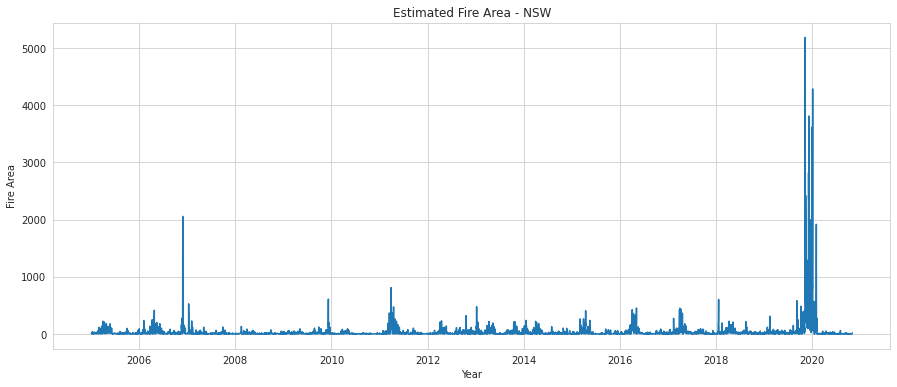

In [24]:
# visualization of estimated  fire area of specific region over time
fig, ax = plt.subplots(figsize = (15, 6))
df_NSW = df_wf[df_wf["Region"] == "NSW"]

sns.lineplot(df_NSW["Date"], df_NSW["Estimated_fire_area"])

ax.set_title("Estimated Fire Area - NSW")
ax.set_xlabel("Year")
ax.set_ylabel("Fire Area")

In [25]:
# segregation of day, month, year in the original dataset to check the seasonality
df_NSW["day"] = df_NSW["Date"].dt.day
df_NSW["month"] = df_NSW["Date"].dt.month
df_NSW["year"] = df_NSW["Date"].dt.year

In [26]:
# validate
df_NSW.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'day', 'month', 'year'],
      dtype='object')

Text(0, 0.5, 'Fire Area')

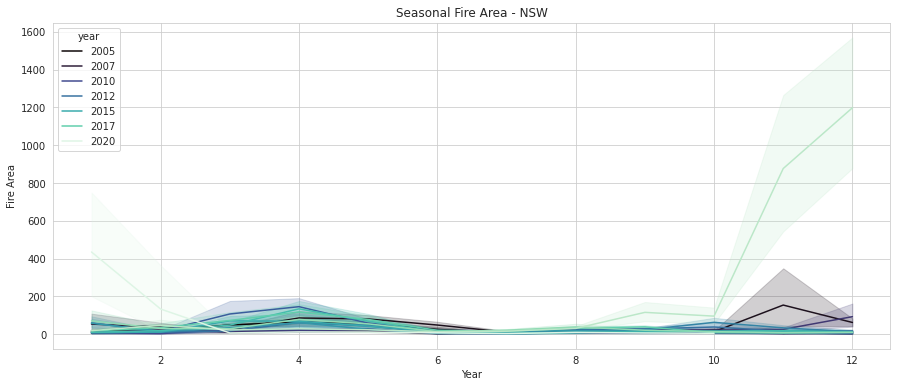

In [27]:
# check for seasonality in Estimated fire area of a region over time
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(df_NSW["month"], df_NSW["Estimated_fire_area"], hue = df_NSW["year"], palette = "mako")

ax.set_title("Seasonal Fire Area - NSW")
ax.set_xlabel("Year")
ax.set_ylabel("Fire Area")

Text(0, 0.5, 'Fire Area - Seasonality')

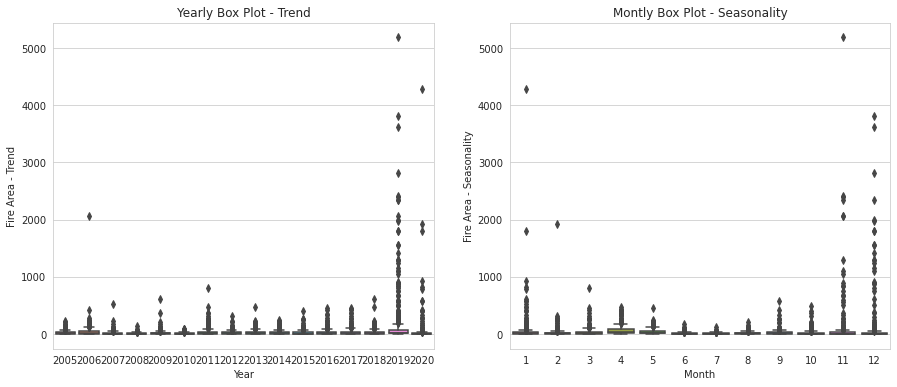

In [28]:
# box plot to check the seasonality wrt year and month
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

sns.boxplot(df_NSW["year"], df_NSW["Estimated_fire_area"], ax = ax[0])
ax[0].set_title("Yearly Box Plot - Trend")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Fire Area - Trend")

sns.boxplot(df_NSW["month"], df_NSW["Estimated_fire_area"], ax = ax[1])
ax[1].set_title("Montly Box Plot - Seasonality")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Fire Area - Seasonality")

In [30]:
# Load the dataset
df_wt = pd.read_csv("/content/Nov_10/HistoricalWeather.csv", parse_dates=[1])
df_wt.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [31]:

# convert Date column to date type
df_wt["Date"] = pd.to_datetime(df_wt["Date"])

In [32]:
# check the information
df_wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242781 entries, 0 to 242780
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 242781 non-null  datetime64[ns]
 1   Region               242781 non-null  object        
 2   Parameter            242781 non-null  object        
 3   count()[unit: km^2]  242781 non-null  float64       
 4   min()                242781 non-null  float64       
 5   max()                242781 non-null  float64       
 6   mean()               242781 non-null  float64       
 7   variance()           242781 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 14.8+ MB


In [33]:
# Intial analysis
print("Rows    : ", df_wt.shape[0])
print("Columns : ", df_wt.shape[1])
print("\nFeatures : ", df_wt.columns.tolist())
print("\nMissing Values : \n",df_wt.isnull().any())
print("\nUnique Values : \n",df_wt.nunique())

Rows    :  242781
Columns :  8

Features :  ['Date', 'Region', 'Parameter', 'count()[unit: km^2]', 'min()', 'max()', 'mean()', 'variance()']

Missing Values : 
 Date                   False
Region                 False
Parameter              False
count()[unit: km^2]    False
min()                  False
max()                  False
mean()                 False
variance()             False
dtype: bool

Unique Values : 
 Date                     5783
Region                      7
Parameter                   6
count()[unit: km^2]         7
min()                  174495
max()                  241802
mean()                 242662
variance()             242662
dtype: int64


In [34]:
# Descriptive Statistics
df_wt.describe().T

,count,mean,std,min,25%,50%,75%,max
count()[unit: km^2],242781.0,1.100786e+06,795500.546644,67785.261409,2.294532e+05,991315.104985,1.730605e+06,2.528546e+06
min(),242781.0,9.539068e+00,14.572877,-5.055067,7.586398e-07,2.368203,1.409707e+01,9.027615e+01
max(),242781.0,2.722397e+01,31.337855,0.000000,5.494375e+00,15.527743,3.208391e+01,5.098331e+02
mean(),242781.0,1.668256e+01,21.045676,0.000000,3.413224e-01,6.709059,2.497674e+01,9.595300e+01
variance(),242781.0,3.904850e+01,94.837253,0.000000,3.435371e-01,2.954298,1.655526e+01,2.064897e+03


In [35]:
# subsetting of data of specific region
df_NT = df_wt[df_wt["Region"] == "NT"]

In [36]:
# segregation of day, month, year in the original dataset to check the seasonality
df_NT["day"] = df_NT["Date"].dt.day
df_NT["month"] = df_NT["Date"].dt.month
df_NT["year"] = df_NT["Date"].dt.year

In [37]:
df_NT.columns

Index(['Date', 'Region', 'Parameter', 'count()[unit: km^2]', 'min()', 'max()',
       'mean()', 'variance()', 'day', 'month', 'year'],
      dtype='object')

In [38]:
# lets plot multivariate analysis for a single year
df_NT_2016 = df_NT[df_NT["year"] == 2016]

In [55]:
# Load the dataset
df_wtf = pd.read_csv("/content/Nov_10/HistoricalWeatherForecasts.csv", parse_dates=[1])
df_wtf.head()

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [56]:
# convert Date column to date type
df_wtf["Date"] = pd.to_datetime(df_wtf["Date"])

In [57]:
# check the information
df_wtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217212 entries, 0 to 217211
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 217212 non-null  datetime64[ns]
 1   Region               217212 non-null  object        
 2   Parameter            217212 non-null  object        
 3   Lead time            217212 non-null  int64         
 4   count()[unit: km^2]  217212 non-null  float64       
 5   min()                217212 non-null  float64       
 6   max()                217212 non-null  float64       
 7   mean()               217212 non-null  float64       
 8   variance()           217212 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 14.9+ MB


In [58]:
# Intial analysis
print("Rows    : ", df_wtf.shape[0])
print("Columns : ", df_wtf.shape[1])
print("\nFeatures : ", df_wtf.columns.tolist())
print("\nMissing Values : \n",df_wtf.isnull().any())
print("\nUnique Values : \n",df_wtf.nunique())

Rows    :  217212
Columns :  9

Features :  ['Date', 'Region', 'Parameter', 'Lead time', 'count()[unit: km^2]', 'min()', 'max()', 'mean()', 'variance()']

Missing Values : 
 Date                   False
Region                 False
Parameter              False
Lead time              False
count()[unit: km^2]    False
min()                  False
max()                  False
mean()                 False
variance()             False
dtype: bool

Unique Values : 
 Date                     2475
Region                      7
Parameter                   5
Lead time                   3
count()[unit: km^2]        15
min()                  179999
max()                  214299
mean()                 216447
variance()             216447
dtype: int64


In [59]:
# Descriptive Statistics
df_wtf.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead time,217212.0,9.660976e+00,4.135758,5.000000,5.000000,10.000000,1.500000e+01,1.500000e+01
count()[unit: km^2],217212.0,1.101102e+06,799723.923013,65671.416905,230045.695238,979710.252773,1.736319e+06,2.542548e+06
min(),217212.0,1.097838e+01,14.678897,-5.018160,0.805676,5.663420,1.582764e+01,2.540969e+02
max(),217212.0,3.313941e+01,55.526747,0.000000,9.633714,23.250812,3.797200e+01,1.000139e+04
mean(),217212.0,2.020531e+01,25.018023,0.000000,3.962613,15.144843,2.922472e+01,5.079335e+03
variance(),217212.0,3.672121e+02,77323.513214,0.000000,1.842921,6.909953,2.977374e+01,2.373057e+07


In [60]:

# subsetting of data of specific region
dff_NT = df_wtf[df_wtf["Region"] == "NT"]

In [61]:
# segregation of day, month, year in the original dataset to check the seasonality
dff_NT["day"] = dff_NT["Date"].dt.day
dff_NT["month"] = dff_NT["Date"].dt.month
dff_NT["year"] = dff_NT["Date"].dt.year

In [63]:
dff_NT.columns

Index(['Date', 'Region', 'Parameter', 'Lead time', 'count()[unit: km^2]',
       'min()', 'max()', 'mean()', 'variance()', 'day', 'month', 'year'],
      dtype='object')

In [66]:
df_NT_2016 = df_NT[df_NT["year"] == 2016]
df_NT_2016


,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance(),day,month,year
168678,2016-01-01,NT,Precipitation,1.357561e+06,0.000000,13.009459,0.397066,1.010601,1,1,2016
168679,2016-01-01,NT,RelativeHumidity,1.357561e+06,19.618942,90.371132,58.726843,399.379222,1,1,2016
168680,2016-01-01,NT,SoilWaterContent,1.357561e+06,0.000000,0.463628,0.184612,0.015052,1,1,2016
168681,2016-01-01,NT,SolarRadiation,1.357561e+06,2.751300,32.156937,24.199027,74.726767,1,1,2016
168682,2016-01-01,NT,Temperature,1.357561e+06,17.970955,35.303539,27.641887,18.484071,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...
184009,2016-12-31,NT,RelativeHumidity,1.357561e+06,33.188160,90.156609,76.191090,96.584611,31,12,2016
184010,2016-12-31,NT,SoilWaterContent,1.357561e+06,0.000002,0.509723,0.294884,0.011289,31,12,2016
184011,2016-12-31,NT,SolarRadiation,1.357561e+06,2.727762,30.405933,15.155844,32.572845,31,12,2016
184012,2016-12-31,NT,Temperature,1.357561e+06,22.956167,31.683556,26.834975,2.411743,31,12,2016


In [67]:
# remove duplicates
df_NT_2016.drop_duplicates(inplace = True)
df_NT_2016

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance(),day,month,year
168678,2016-01-01,NT,Precipitation,1.357561e+06,0.000000,13.009459,0.397066,1.010601,1,1,2016
168679,2016-01-01,NT,RelativeHumidity,1.357561e+06,19.618942,90.371132,58.726843,399.379222,1,1,2016
168680,2016-01-01,NT,SoilWaterContent,1.357561e+06,0.000000,0.463628,0.184612,0.015052,1,1,2016
168681,2016-01-01,NT,SolarRadiation,1.357561e+06,2.751300,32.156937,24.199027,74.726767,1,1,2016
168682,2016-01-01,NT,Temperature,1.357561e+06,17.970955,35.303539,27.641887,18.484071,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...
184009,2016-12-31,NT,RelativeHumidity,1.357561e+06,33.188160,90.156609,76.191090,96.584611,31,12,2016
184010,2016-12-31,NT,SoilWaterContent,1.357561e+06,0.000002,0.509723,0.294884,0.011289,31,12,2016
184011,2016-12-31,NT,SolarRadiation,1.357561e+06,2.727762,30.405933,15.155844,32.572845,31,12,2016
184012,2016-12-31,NT,Temperature,1.357561e+06,22.956167,31.683556,26.834975,2.411743,31,12,2016
